In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)
OUTDATED_IGNORE=1

In [2]:
data_frame = pd.read_csv('./waga.csv')
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        78 non-null     object 
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.4+ KB


The weight.csv dataset contains data on 78 people who were on different diets for 6 weeks.
1. Person - information about the person - numerical data
2. Gender - gender of the person on the diet - categorical data
3. Age - age of the person on the diet - numerical data
4. Height - height (of the person on the diet - numerical data
5. Pre.weight - weight before the diet - numerical data
6. Diet - inofmation about what diet the person was on - categorical data
7. weight6weeks - weight after the diet - numerical data

Categorical data was coded using numbers.

In [4]:
#check the first 10 entries in the dataset
data_frame.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


In [5]:
# check missing data
data_frame.isnull().sum()

Person          0
gender          0
Age             0
Height          0
pre.weight      0
Diet            0
weight6weeks    0
dtype: int64

In [6]:
data_frame.loc[0,'gender']

' '

Checking whether there are missing observations in the set using the `isnull` method, we got the information that there are no missing observations in any of the columns, but in the earlier preview we could see that the first two entries are missing information on gender. Checking what data is in the first record for gender turns out to be a whitespace.

In [7]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
Person,78.0,39.500000,22.660538,1.0,20.25,39.50,58.750,78.0
Age,78.0,39.153846,9.815277,16.0,32.25,39.00,46.750,60.0
Height,78.0,170.820513,11.276621,141.0,164.25,169.50,174.750,201.0
pre.weight,78.0,72.525641,8.723344,58.0,66.00,72.00,78.000,103.0
Diet,78.0,2.038462,0.812920,1.0,1.00,2.00,3.000,3.0
weight6weeks,78.0,68.680769,8.924504,53.0,61.85,68.95,73.825,103.0


From the `describe` table we can infer:
- the average age of the test person is about 39, the youngest person was 16 and the oldest was 60,
- the average height of the test person is about 171, the lowest height is 141, and the highest is 201,
- the average weight before the diet is about 72.5, the lowest weight before the diet is 58, and the highest weight before the diet is 103.
- the average weight after the diet is about 68.5, the lowest weight after the diet is 53, and the highest weight after the diet is 103.

A general conclusion can be made that the diets were effective, the average weight after is lower than the average weight before the diet.

### Gender

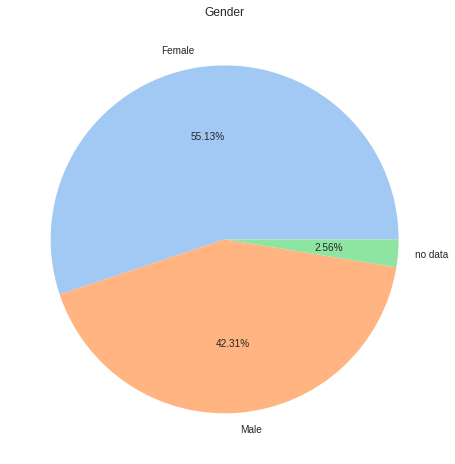

In [8]:
gender = data_frame['gender'].value_counts()
colors = sns.color_palette('pastel')[0:3]
plt.pie(gender, autopct='%1.2f%%', labels=['Female', 'Male', 'no data'], colors=colors)
plt.title('Gender')
plt.show()

In [9]:
gender

0    43
1    33
      2
Name: gender, dtype: int64

Most of the people on the diet were women, there were 43 of them. There were 33 men, and for two people we do not have data on their gender.

### Age

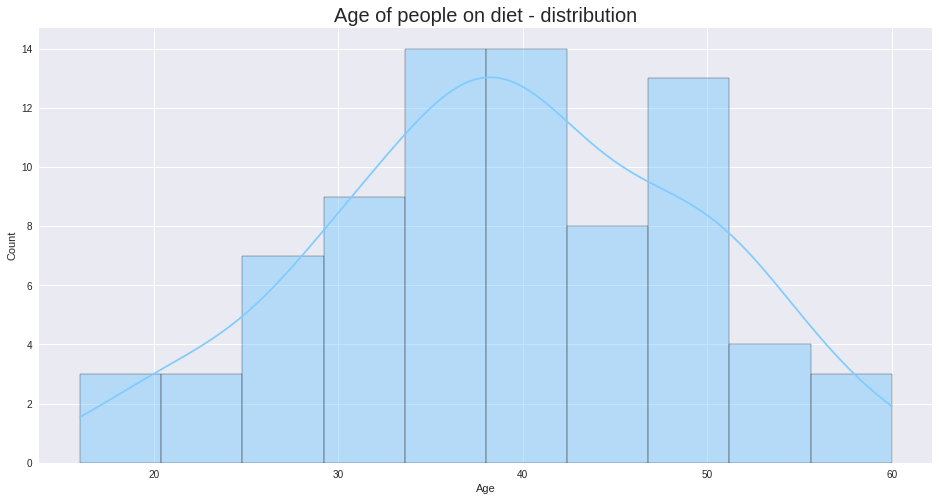

In [10]:
sns.histplot(x='Age',data=data_frame,bins=10,kde=True, color='#80ccff' )
plt.xlabel('Age')
plt.title('Age of people on diet - distribution', size=20)
plt.show()

In [11]:
data_frame['Age'].describe()

count    78.000000
mean     39.153846
std       9.815277
min      16.000000
25%      32.250000
50%      39.000000
75%      46.750000
max      60.000000
Name: Age, dtype: float64

Most people were in the 35-45 age range. The youngest person was 16, and the oldest was 60. The average age of a person on diet was 39.

### Height

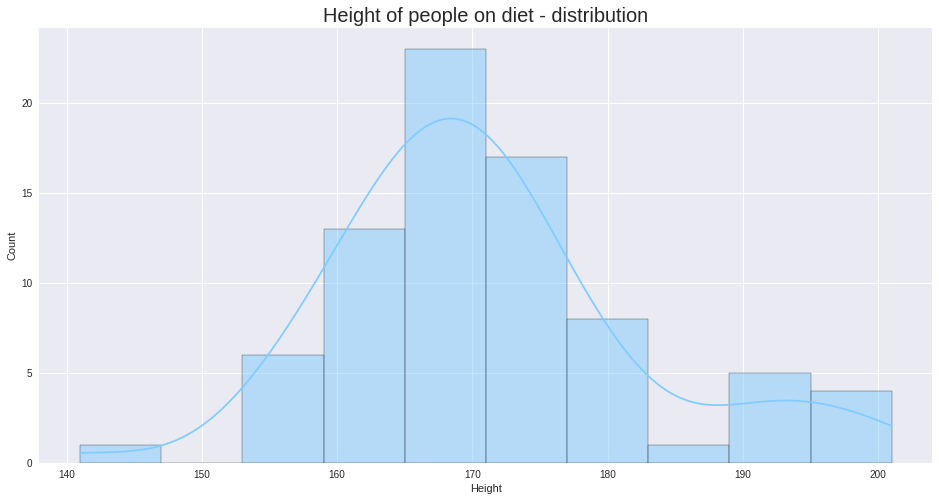

In [12]:
sns.histplot(x='Height',data=data_frame, bins=10,kde=True, color='#80ccff')
plt.xlabel('Height')
plt.title('Height of people on diet - distribution', size=20)
plt.show()

In [13]:
data_frame['Height'].describe()

count     78.000000
mean     170.820513
std       11.276621
min      141.000000
25%      164.250000
50%      169.500000
75%      174.750000
max      201.000000
Name: Height, dtype: float64

The average height of a person on diet is about 171, and the histogram also shows that the most common height is in the range of about 165-171. The lowest person has a height of 141, and the highest 201.

### Weight before and weight after the diet

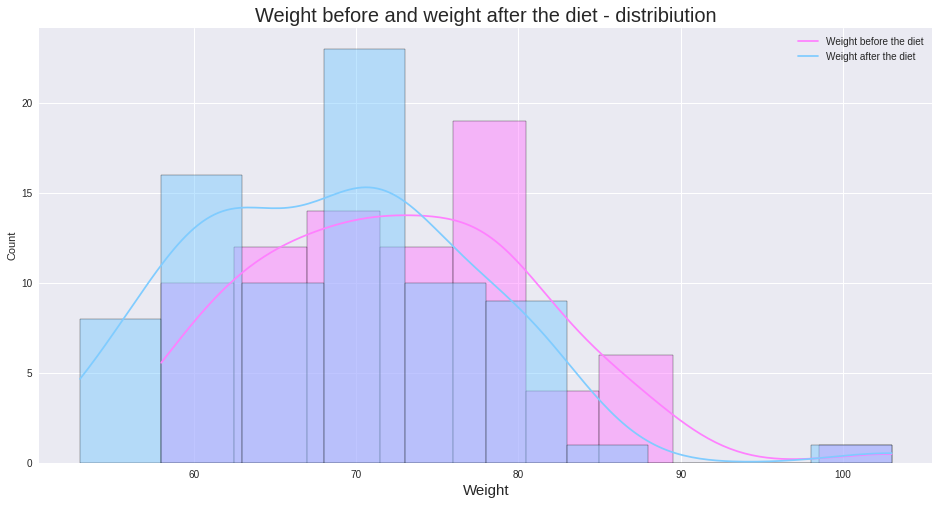

In [14]:
sns.histplot(x='pre.weight',data=data_frame,bins=10,kde=True, color='#ff80ff' )
sns.histplot(x='weight6weeks',data=data_frame,bins=10,kde=True, color='#80ccff' )
plt.legend(['Weight before the diet', 'Weight after the diet'])
plt.xlabel('Weight', size=15)
plt.title('Weight before and weight after the diet - distribiution', size=20)
plt.show()

In [15]:
data_frame[['pre.weight','weight6weeks']].describe()

,pre.weight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


Looking at the histograms above and the summaries for the columns containing the before diet and after diet weight data, we can conclude that the diets were successful. The distribution of the weight data after the diet is shifted to the left compared to the distribution of the weight data before the diet - that is, the values for weight after the diet have lower values. 
<br>Before the diet, the most values for weight were in the range of about 76-80. The average weight before the diet was 72.5. The lowest weight before the diet was 58, and the highest weight before the diet was 103. <br>
After the diet, the highest values for weight were in the 67-71 range, the average weight after the diet was 68.6 - which also confirms that the diets were effective. The lowest weight after the diet was 53, while the highest weight did not change, still at 103.

### Diet type

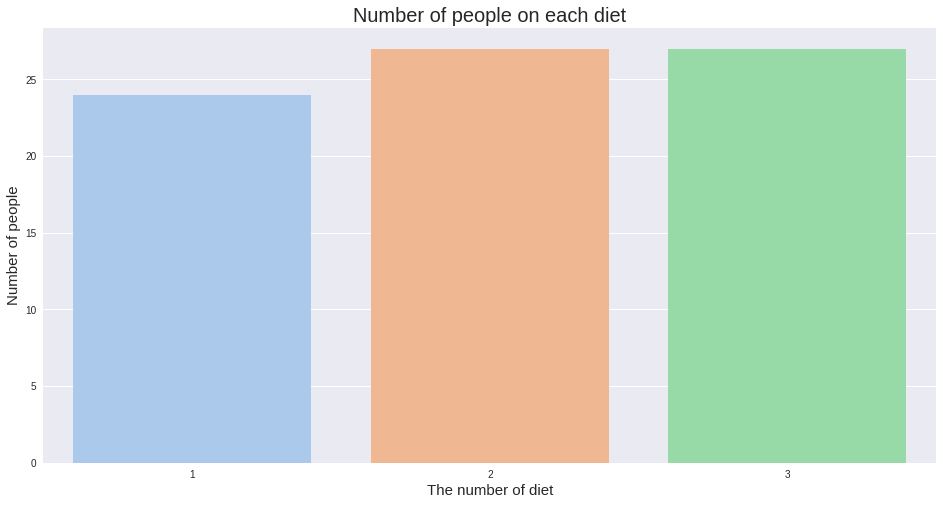

In [16]:
diets = data_frame['Diet'].value_counts()
diets = diets.reset_index()
sns.barplot(data=diets, x='index', y='Diet', palette ='pastel')
plt.xlabel('The number of diet', size =15)
plt.ylabel('Number of people', size=15)
plt.title('Number of people on each diet', size=20)
plt.show()

In [17]:
diets

,index,Diet
0,2,27
1,3,27
2,1,24


From the above chart and the table we know that there were 27 people on diet numbers 2 and 3, and 24 people on diet number 1.

In [18]:
alpha = 0.05
stat, p = stats.chisquare(diets['Diet'])
if p > alpha:
    print("The number of people in the groups is equal, p-value:", p)
else:
    print("The number of people in the groups is not equal, p-value:", p)

The number of people in the groups is equal, p-value: 0.8910233766955563


I decided to perform the chisquare test to compare group sizes. The result of the test confirmed that statistically the number of people in each group was equal.

### Effectiveness of diets

To better analyze the effectiveness of diets, I added a column that calculates the difference between the weight after the diet and the weight before the diet.

In [19]:
data_frame['difference'] = data_frame['weight6weeks'] - data_frame['pre.weight'] 

In [20]:
data_frame

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,difference
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,-3.8
3,2,0,46,192,60,1,54.0,-6.0
4,3,0,55,170,64,1,63.3,-0.7
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,-2.8
74,75,1,49,177,84,3,79.9,-4.1
75,76,1,28,164,85,3,79.7,-5.3
76,77,1,40,167,87,3,77.8,-9.2


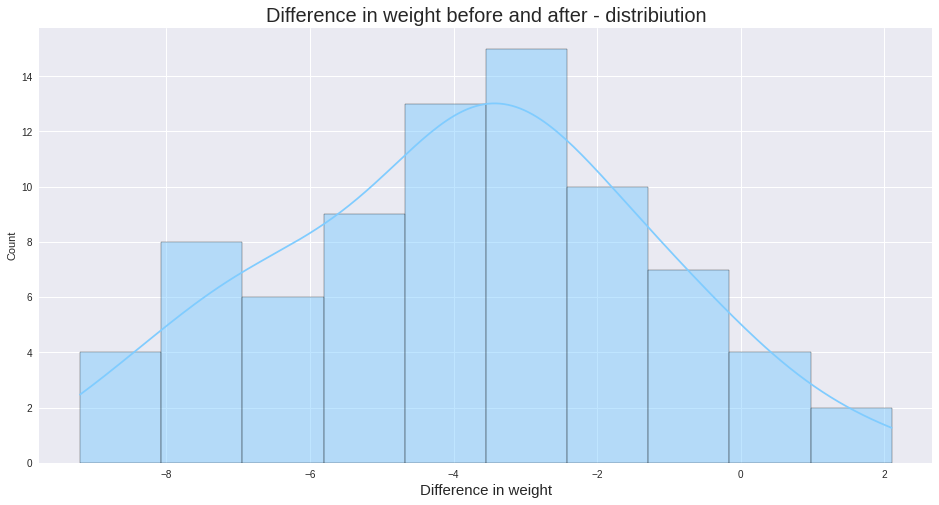

In [22]:
sns.histplot(x='difference',data=data_frame,bins=10,kde=True, color='#80ccff' )
plt.xlabel('Difference in weight', size=15)
plt.title('Difference in weight before and after - distribiution', size=20)
plt.show()

In [23]:
data_frame['difference'].describe()

count    78.000000
mean     -3.844872
std       2.551478
min      -9.200000
25%      -5.550000
50%      -3.600000
75%      -2.000000
max       2.100000
Name: difference, dtype: float64

Using the `describe` method on the new column and the histogram for this variable tells us that on average a person on the diet lost 3.84 in weight, values close to this number were also the highest. The largest weight loss was 9.2. Not everyone managed to lose weight, and there were people who gained weight while on the diet, the largest gain was 2.1.

In [24]:
# create a new column with diet results
def result(różnica):
    if różnica == 0:
        return 0
    elif różnica > 0:
        return 1
    return 2

In [25]:
data_frame['result'] = data_frame['difference'].apply(result)

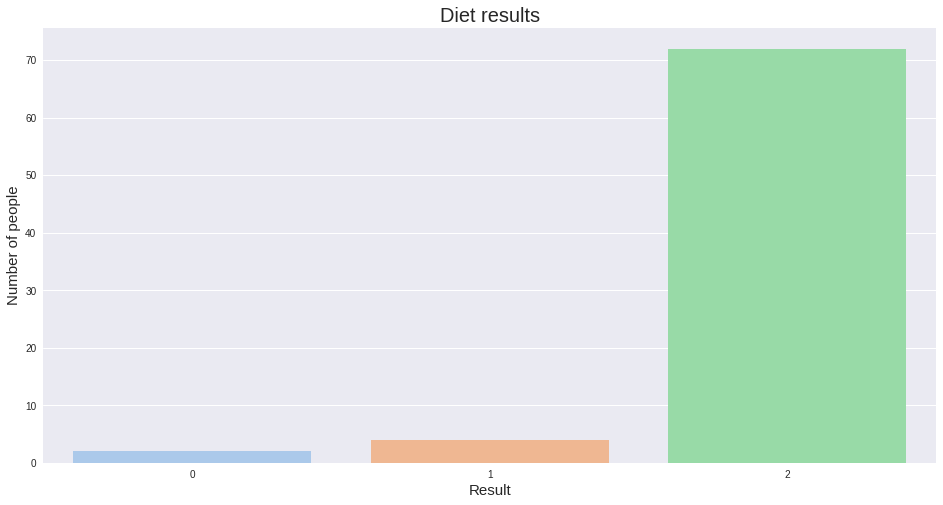

In [29]:
results = data_frame['result'].value_counts()
results = results.reset_index()
sns.barplot(data=results, x='index', y='result', palette ='pastel')
plt.xlabel('Result', size =15)
plt.ylabel('Number of people', size=15)
plt.title('Diet results', size=20)
plt.show()

In [30]:
results

,index,result
0,2,72
1,1,4
2,0,2


Almost all of the people (72) lost weight after the diet. 4 people gained weight, and 2 reported no change in weight.

#### TASK 6a
The average height of men in Poland, is 177.3 and women 164.6. Verify the hypothesis that the average height of the people in the dataset is the same as the Poles. 

Null hypothesis: The height of the people is the same as the height of Poles.<br>
Alternate hypothesis: The height of the people is different from the height of Poles.<br>

In order to choose the right test, we will start by checking whether the data in the column containing height data comes from a normal distribution.

We will use the Shapiro-Wilk test with a significance level of 0.05 as the first test and set up theses:
Null hypothesis: The data are from a normal distribution.
Alternate hypothesis: The data are not from a normal distribution.

In [31]:
data = data_frame['Height']
alpha = 0.05
stat, p = stats.shapiro(data)
if p > alpha:
    print("Probably a normal distribiution")
else:
    print("Probably not a normal distribiution")
print('stat:', stat, 'p-value:', p)

Probably not a normal distribiution
stat: 0.9432562589645386 p-value: 0.0016975137405097485


The test performed showed us a low p-value. It is below our accepted level of significance, and this means that we reject the null hypothesis, which assumed that the data come from a normal distribution. According to the test, they do not come from a normal distribution.<br>
However, we won't stop testing at one test, we will check other possibilities using qqplot.

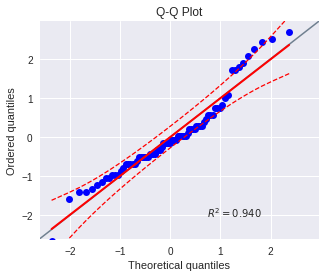

In [36]:
pg.qqplot(data_frame['Height'], dist='norm')
plt.show()

In the qqplot for the column with the height data, we see that some of the data aligns along the red line, and some moves away from it. This may indicate a lack of normality in the distribution.<br>
To be absolutely sure, I will use the rule of thumb and check the values of skewness, kurtosis, median and mean.

In [37]:
stats.skew(data_frame['Height']), stats.kurtosis(data_frame['Height'])

(0.6882176548173298, 0.7856260168567233)

In [38]:
data_frame['Height'].mean(),data_frame['Height'].median()

(170.82051282051282, 169.5)

Based on the above results, we can assume that the data is from a normal distribution, since it meets all 2 conditions of the "rule of thumb": <br>the skewness is from the interval (-1.1), the kurtosis is from the interval (-1.1), and the median and mean are close to each other.
Therefore, to test whether the height of the subjects is the same as the height of Poles I will use the Student's t test, which tests whether the means of two groups are significantly different. Again, we use a significance level of 0.05.

In [93]:
data1 = data_frame['Height']
data2 = [177.3, 164.6]
alpha = 0.05
stat, p = stats.ttest_ind(data1, data2)
if p > alpha:
    print('The height of the people is the same as the height of Poles')
else:
    print('The height of the people is different from the height of Poles')
print('statystyka:', stat, 'p-value:', p)

The height of the people is the same as the height of Poles
statystyka: -0.01607259114812538 p-value: 0.9872175209483999


The test result shows that there is no basis for rejecting the null hypothesis, which assumes that the average height of the people in the dataset is the same as the average height of Poles.
## TASK 6b
In the dataset there are two information - weight before the diet and weight after the diet. Can
we assume that the use of diets is effective?

And here again, in order to conduct a test and test the thesis of whether diets are effective we will start by checking from what distribution the data from the columns containing information on weight before the diet and after the diet come. Therefore, I will again run the Shapior-Wilk tests, make qqplots and check the rule of thumb for each column.
<br> Let's start with the Shapiro-Wilk test

In [42]:
data = data_frame['pre.weight']
alpha = 0.05
stat, p = stats.shapiro(data)
if p > alpha:
    print("Probably a normal distribiution")
else:
    print("Probably not a normal distribiution")
print('stat:', stat, 'p-value:', p)

Probably a normal distribiution
stat: 0.9691721796989441 p-value: 0.055405594408512115


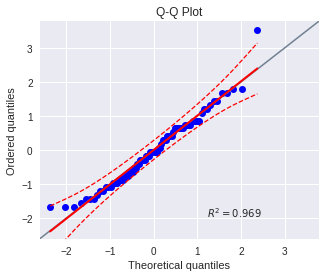

In [43]:
pg.qqplot(data_frame['pre.weight'], dist='norm')
plt.show()

In [44]:
stats.skew(data_frame['pre.weight']), stats.kurtosis(data_frame['pre.weight'])

(0.5024639581928805, 0.4796236428282734)

In [45]:
data_frame['pre.weight'].mean(), data_frame['pre.weight'].median()

(72.52564102564102, 72.0)

Shapiro-Wilk test, qqplot plot show that the distribution of weight data before the diet is normal. This is also confirmed by the rule of thumb: kurtosis and skewness is in the interval (-1, 1) and the mean and median are close to each other.

In [46]:
data = data_frame['weight6weeks']
alpha = 0.05
stat, p = stats.shapiro(data)
if p > alpha:
    print("Probably a normal distribiution")
else:
    print("Probably not a normal distribiution")
print('stat:', stat, 'p-value:', p)

Probably not a normal distribiution
stat: 0.9579498171806335 p-value: 0.011488787829875946


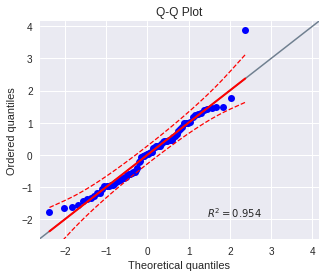

In [47]:
pg.qqplot(data_frame['weight6weeks'], dist='norm')
plt.show()

In [48]:
stats.skew(data_frame['weight6weeks']), stats.kurtosis(data_frame['weight6weeks'])

(0.6601099761662811, 1.2265134589638853)

In [49]:
data_frame['weight6weeks'].mean(), data_frame['weight6weeks'].median()

(68.6807692307692, 68.95)

As for the data in the column on weight after 6 weeks, here both the Shapiro-Wilk test, the qqplot and the rule of thumb indicate that we cannot assume that the distribution of this data is normal. Therefore, in order to confirm the thesis that the diet is effective, we cannot use the student's t test for two related samples, but its parametric equivalent, the Wilcoxon test for pairs of observations. Again, we will assume a significance level of 0.05 and assume the following theses:<br>
Null hypothesis: The means in the groups are equal
<br>Altenrative hypothesis: The means in the groups are not equal

In [50]:
data1 = data_frame['pre.weight']
data2 = data_frame['weight6weeks']
alpha = 0.05
stat, p = stats.wilcoxon(data1, data2)
if p > alpha:
    print ('The means in the groups are equal')
else:
    print('The means in the groups are not equal')
print('stat:', stat, 'p-value:', p)

The means in the groups are not equal
stat: 33.5 p-value: 1.345573261261036e-13


The result of the test allowed us to reject the thesis that the means in both groups are equal, so we can assume that the use of diets is effective. This also confirms my earlier conclusions assumed the use of diets is effective.

In [53]:
#checking the same with the t-test on two related samples
data1 = data_frame['pre.weight']
data2 = data_frame['weight6weeks']
stat, p = stats.ttest_rel(data1, data2)
alpha = 0.05
if p > alpha:
    print ('The means in the groups are equal')
else:
    print('The means in the groups are not equal')
print('stat:', stat, 'p-value:', p)

The means in the groups are not equal
stat: 13.308753851748712 p-value: 1.1722360462415227e-21
